In [10]:
%matplotlib inline

In [11]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

#### 다항분포 나이브베이즈 모형
- 다항분포 나이브베이즈 모형 클래스 MultinomialNB는 가능도 추정과 관련 속성
     - feature_count_: 각 클래스  k 에서  d 번째 면이 나온 횟수  $N_{d,k}$ 
     - feature_log_prob_: 다항분포의 모수의 로그
$$\log \mu_k = (\log \mu_{1,k}, \ldots, \log \mu_{D, k}) = \left( \log \dfrac{N_{1,k}}{N_k}, \ldots, \log \dfrac{N_{D,k}}{N_k} \right)$$
- $N_k$ 은 클래스 $k$에 대해 주사위를 던진 총 횟수
- 스무디 공식
$$\hat{\mu}_{d,k} = \frac{ N_{d,k} + \alpha}{N_k + D \alpha}$$


##### 예시 - 스팸 메일 필터링
 - BOW 인코딩 시, 각 키워드가 출현한 빈도를 직접 입력 변수로 사용

In [23]:
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [24]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

In [25]:
# 클래스
model_mult.classes_

array([0, 1])

In [26]:
# 클래스별 숫자
model_mult.class_count_

array([4., 6.])

In [27]:
# 각 클래스에 대한 가능도 확률분포를 구함
# 각 클래스를 4개의 면을 가진 주사위로 생각
# 각 면이 나올 확률은 각 면이 나온 횟수를 주사위를 던진 전체 횟수로 나눔
# 각 클래스 별로 각각 면이 나온 횟수
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [28]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

In [29]:
# 가중치 1인 스무딩
model_mult.alpha

1.0

In [30]:
# 모수 추정치
theta = np.exp(model_mult.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [31]:
# 값을 예측
# 메일에 1번부터 4번까지 키워드가 10번씩 나온 경우
# 스팸 메일임
x_new = np.array([10, 10, 10, 10])
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

In [34]:
# 다항분포의 확률질량함수를 사용하여 직접 확률 계산
p = (theta ** x_new).prod(axis=1)*np.exp(model_mult.class_log_prior_)
p / p.sum()

array([0.38848858, 0.61151142])

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [3]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

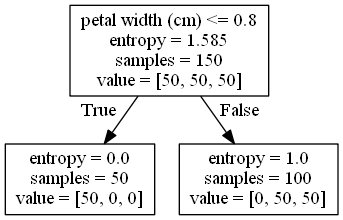

In [4]:
draw_decision_tree(tree1)

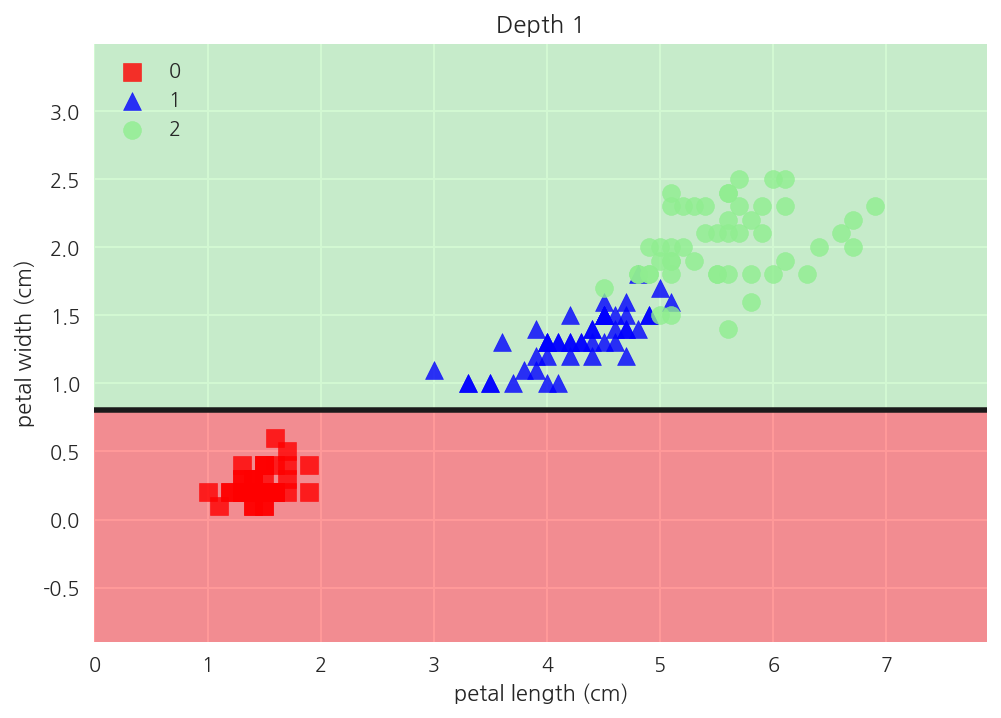

In [22]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()